# 프로젝트
# This is your playground! Leaderboard를 정복해주세요!

#### Data fields

ID : 집을 구분하는 번호

date : 집을 구매한 날짜

price : 집의 가격(Target variable)

bedrooms : 침실의 수

bathrooms : 화장실의 수

sqft_living : 주거 공간의 평방 피트(면적)

sqft_lot : 부지의 평방 피트(면적)

floors : 집의 층 수

waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)

view : 집이 얼마나 좋아 보이는지의 정도

condition : 집의 전반적인 상태

grade : King County grading 시스템 기준으로 매긴 집의 등급

sqft_above : 지하실을 제외한 평방 피트(면적)

sqft_basement : 지하실의 평방 피트(면적)

yr_built : 지어진 년도

yr_renovated : 집을 재건축한 년도

zipcode : 우편번호

lat : 위도

long : 경도

sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno   # 결측치를 확인하기위해서 사용하는 모듈

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

1.3.3
3.1.1
0.4.2
1.1.1


In [4]:
data_dir = os.getenv('HOME')+'\\Desktop\\SUN\\aiffel\\EXPLORATION\\kaggle-kakr-housing-data\\data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)


얍💢


In [5]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

#date 컬럼 20220920 형태로만들기

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
y = train['price']
del train['price']

print(train.columns)


# y에 price넣어주고 train에서 삭제하기

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
del train['id']

print(train.columns)

#id는 index와 동일하니 불필요로 제거

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
# train['waterfront'].value_counts()

In [11]:
# del train['date']
# del train['zipcode']

# print(train.columns)

In [12]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [13]:
# del test['date']
# del test['zipcode']

In [14]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

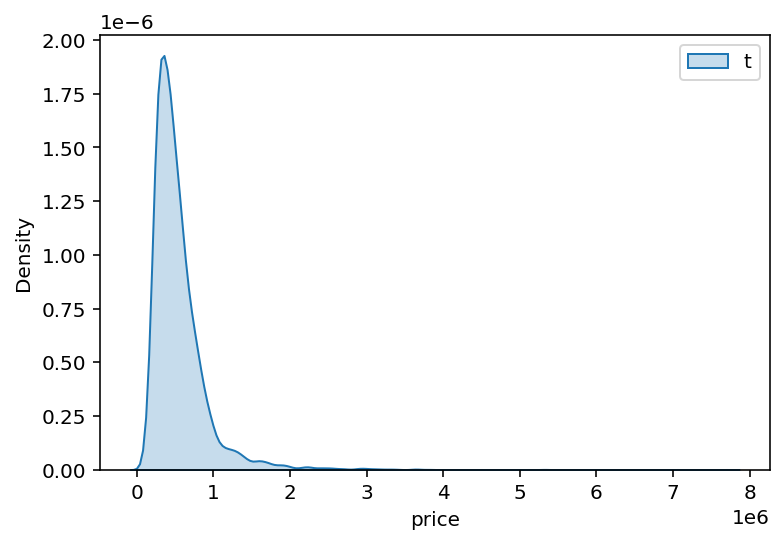

In [15]:
sns.kdeplot(y,shade= True) # shade는 곡선아래공간 음영처리 여부
plt.legend('train')
plt.show()


kde 커널밀도 추정
분포를 확인할때 히스토그램을 많이쓰는데, 구간 설정에따라 결과물이 달라질 수 있음
이상한 해석을 할 수도
대안으로 kde사용한다
히스토그램같은 분포를 곡선으로 그려줌

##### 그림을 보면 

한쪽으로 치우쳐진걸 볼 수 있음

In [16]:
y = np.log1p(y)
y

# y에 로그함수를 취해준다

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

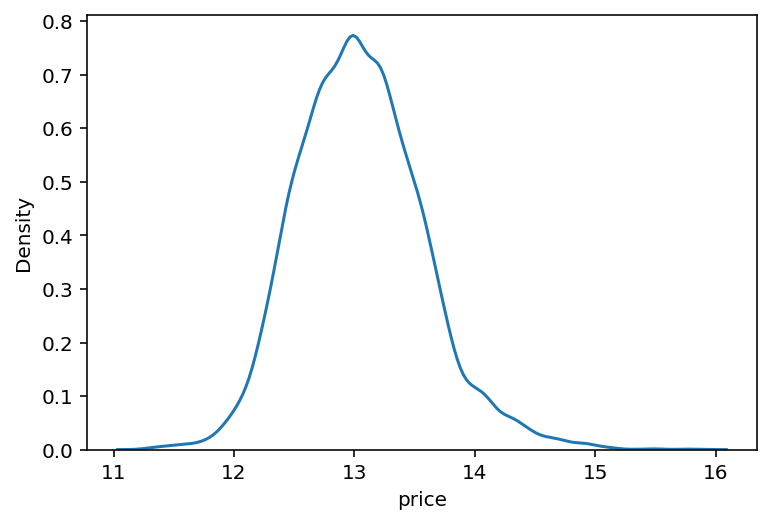

In [18]:
sns.kdeplot(y)
plt.show()

# 로그함수처리를한 y의 커널밀도추정플롯
# 정규분포 모양인걸 확인할 수 있음

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


얍💢


In [21]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


얍💢


In [22]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [24]:
random_state = 2020    

xgboost =XGBRegressor(learning_rate= 0.1, max_depth = 5, n_estimators = 1000, random_state = random_state)
lightgbm = LGBMRegressor(num_leaves=70,learning_rate=0.08,max_depth =30, n_estimators=200, random_state=random_state)
gboost = GradientBoostingRegressor(learning_rate = 1.0, max_depth = 5, max_features = 0.6, n_estimators = 500, random_state = random_state)
random = RandomForestRegressor(max_depth = 5, max_features = 1.0, n_estimators = 100, random_state = random_state)

models = [gboost, xgboost, lightgbm, random]

In [25]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [26]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
#     print(f'y_pred:{y_pred}')

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 187788.1210279438,
 'XGBRegressor': 107717.7134130304,
 'LGBMRegressor': 110939.59859132337,
 'RandomForestRegressor': 173414.32287273486}

In [27]:
def get_scores(models, train, y):
    # 답안 작성
    
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,187788.121028
RandomForestRegressor,173414.322873
LGBMRegressor,110939.598591
XGBRegressor,107717.713413


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    
    print(prediction)
    prediction = np.expm1(prediction)
    
    data_dir = os.getenv('HOME')+'\\Desktop\\SUN\\aiffel\\EXPLORATION\\kaggle-kakr-housing-data\\data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    
    
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print(rmsle)
    print('{} saved!'.format(submission_csv_path))


In [30]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs =5):
    # 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs= n_jobs)
    # 모델 학습
    grid_model.fit(train, y)

    #결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    #RMSLE 추가한 후 높은 순서로 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results
    

In [31]:
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [1, 10],
    'learning_rate':[0.1],
}

## LGBMRegression

In [32]:
model = LGBMRegressor(num_leaves=70,learning_rate=0.08,max_depth =30, n_estimators=200, random_state=random_state)
#my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

In [33]:
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.11210769, 13.09851511, 14.12404764, ..., 13.00507561,
       12.68994583, 12.97297946])

In [34]:
prediction = np.expm1(prediction)
#예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌리기
prediction
len(prediction)

6468

In [35]:
data_dir = os.getenv('HOME')+'\\Desktop\\SUN\\aiffel\\EXPLORATION\\kaggle-kakr-housing-data\\data'


submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [36]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.948974e+05
1,15036,4.882159e+05
2,15037,1.361431e+06
3,15038,3.086416e+05
4,15039,3.254940e+05


In [37]:
submission_csv_path = '{}/submission_{}_RMSLE.csv'.format(data_dir, 'lgbm')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

C:\Users\SUN\Desktop\SUN\aiffel\EXPLORATION\kaggle-kakr-housing-data\data/submission_lgbm_RMSLE.csv


In [38]:
# grid_model = GridSearchCV(model, param_grid=param_grid, \
#                         scoring='neg_mean_squared_error', \
#                         cv=5, verbose=1, n_jobs=5)

# grid_model.fit(train, y)

In [39]:
# grid_model.cv_results_

In [40]:
##params = grid_model.cv_results_['params']  
# 각 파라미터의 조합
#params

In [41]:
##score = grid_model.cv_results_['mean_test_score']   
#각각에 대한 테스트 점수
# 각 조합에 대한 점수
#score    

In [42]:
# results = pd.DataFrame(params)
# results['score'] = score

# results

In [43]:
# results['RMSE'] = np.sqrt(-1 * results['score'])
# results

In [44]:
# results = results.rename(columns={'RMSE': 'RMSLE'})
# # 로그 변환되어있는 price상태에서 손실함수값을 계산함 
# # 해서 rmse가 아니라 rmsle이다

# results = results.sort_values('RMSLE')
# # 낮은 순서대로 정렬

# results

In [45]:
# lightgbm = LGBMRegressor(max_depth = 20, n_estimators=500, random_state=random_state)
# model.fit(train, y)
# prediction1 = model.predict(test)
# prediction1

In [46]:
# prediction1 = np.expm1(prediction1)
# #예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌리기
# prediction1

In [47]:
# data_dir = os.getenv('HOME')+'\\Desktop\\SUN\\aiffel\\EXPLORATION\\kaggle-kakr-housing-data\\data'


# submission_path = join(data_dir, 'sample_submission.csv')
# submission = pd.read_csv(submission_path)
# submission.head()

In [48]:
# submission['price'] = prediction1
# submission.head()
# len(prediction1)

In [49]:
# submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
# submission.to_csv(submission_csv_path, index=False)
# print(submission_csv_path)

In [50]:
# save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

## XGBR

In [67]:
model = XGBRegressor(learning_rate= 0.1, max_depth = 5, n_estimators = 900, random_state = random_state)
# XGBRegressor(learning_rate= 0.08, max_depth = 6, n_estimators = 750, random_state = random_state) 
#XGBRegressor(eta=0.5,learning_rate= 0.08, max_depth = 7, n_estimators =750, random_state = random_state)
#my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

# 가장 낮은 점수가 나오는 하이퍼 파라미터를 찾기위해 위랑 다르게 개별 모델 돌림

In [68]:
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.180366, 13.040287, 14.198404, ..., 13.075853, 12.708772,
       13.020559], dtype=float32)

In [69]:
prediction = np.expm1(prediction)
#예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌리기
prediction

array([ 529857.6 ,  460599.8 , 1466521.2 , ...,  477276.5 ,  330634.47,
        451602.25], dtype=float32)

In [70]:
data_dir = os.getenv('HOME')+'\\Desktop\\SUN\\aiffel\\EXPLORATION\\kaggle-kakr-housing-data\\data'


submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [71]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.298576e+05
1,15036,4.605998e+05
2,15037,1.466521e+06
3,15038,3.070920e+05
4,15039,3.244835e+05


In [72]:
submission_csv_path = '{}/submission_{}_RMSLE.csv'.format(data_dir, 'xgb')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

C:\Users\SUN\Desktop\SUN\aiffel\EXPLORATION\kaggle-kakr-housing-data\data/submission_xgb_RMSLE.csv


## GradientBoostingRegression

In [57]:
model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
4,0.1,10,150,-0.029406,0.171483
5,0.1,10,200,-0.029425,0.171537
3,0.1,10,100,-0.029481,0.171699
2,0.1,1,200,-0.045147,0.212479
1,0.1,1,150,-0.048459,0.220135
0,0.1,1,100,-0.055036,0.234597


## RANDOMFOREST

In [58]:
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [1, 10],
}

# 랜덤숲은 파라미터로 learning-rate가 없다. 해서 다시 param_grid지정해준다

In [59]:
model = RandomForestRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,max_depth,n_estimators,score,RMSLE
5,10,200,-0.034942,0.186928
4,10,150,-0.035057,0.187235
3,10,100,-0.035238,0.187718
2,1,200,-0.178639,0.422657
1,1,150,-0.178968,0.423046
0,1,100,-0.179128,0.423235


# 회고

### 1. 이번프로젝트에서 어려웠던 점

노드를 진행하면서 보고 따라했을때에는 이해하면서 넘어갔는데, 뒷부분에서 프로젝트를 하면서 어디서부터 어떻게 시작해야할지 막막했다.

노드 내용에 대해 제대로 이해하지 못하고 프로젝트를 시작했다고 생각했고, 앞부분과 개념을 찾아보았지만 여전히 확실하게 학습하진 못한것같다.

각 모델에 관한 것들이 어려웠고, 점수를 낮추기위해 시도하는 과정에서 파라미터에 여러가지를 넣어보며 시간을 투자했는데, 잘 줄어들지 않아 힘들었다.

### 2. 알아낸 점 혹은 아직 모호한 점

lgbm과 rbgr이 가장 낮은 rmsle 값이 나온다는것을 확인하고 점수를 더 줄이기위해 좋은 방법은 무었일까를 고민하다가

하이퍼 파라미터를 튜닝해 제출해보고 결과를 보면서 점수가 낮아지는것을 보고 
파라미터의 값들이 어떤것을 의미하는지 더 꼼꼼히 확인했고,하나씩 따져보며 시도를해보았다.

모델마다 파라미터값이 같아도 결과가 다르고, 파라미터가 제각각 다르다는것도 알 수 있었다.

캐글에서 점수를 낮추기위해 rmsle값이 낮은것이 맞다고 생각했었는데,
rmsle 값이 무작정 낮다고해서 제출후 private score값이 낮아지는것이 아니라는것을 알았다.
이 점에 대해 왜? 라는 의문을 가졌고, 앞으로 더 알아봐야 할 것 같다.

전처리 과정에서 zipcode와 date feature는 제외시켜도 될 것 같아서 제외했었는데, 
제외시켰더니 오히려 점수가 더 높게 나왔었다. 당연히 좋은 결과로 나올 것이라고 생각했는데, 그게 아니라서 의외였다.


### 3. 루브릭 평가 지표를 맞추기 위해 시도한 것들

가장 신경을 썼던것은 캐글에 제출하고 private score를 110000이하의 점수가 나오지 않아 그 부분을 통과하려고 각 모델별 하이퍼 파라미터를 검색해보고 수많은 값으로 시도해보았다.

점수가 생각보다 떨어지지않아서 끝까지 붙잡다가도 포기하려고했었지만,
마지막에는 private score 109411 을 달성했다.
포기하지 않고 시도한 나에게 셀프칭찬한다.

### 4. 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정, 느낌

3번 평가 문항을 만족 시키겠다는 생각으로 2번에서 결과에 대한 설명이나 시각화한 부분들이 부족하지 않을까. 하는 생각이 든다.


### 5. 자기 다짐

이번 익스가 전체적으로 이해하는데에 시간이 가장 많이 걸렸고, 
루브릭을 달성하기위해 가장 오랜시간 투자해서 시도했던것 같다.

오랜시간 붙잡은만큼, 원하는 점수를 달성해서 좋지만, 아직 모든 개념이 다 이해된건 아니라서 아쉬움이 많이 남는다.

In [76]:
from IPython.display import Image

Image(url="score.png")
#점수 달성 인증